In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def lag_w_f(fnc,n,x_plot):
    x_inter = np.linspace(0.0,3.14159,n+1)
    x_inter.reshape(1,n+1)
    m = len(x_plot)
    ln = np.zeros((n+1,m))
    for i in range(0,n+1):
        xp = np.delete(x_inter,[i])
        for j in range(0,m):
            ln[i][j] = np.prod((x_plot[j]-xp)/(x_inter[i]-xp))
    ln = np.mat(ln)
    lagrange = fnc(x_inter)*ln
    lagrange = list(lagrange.flat)
    return lagrange


In [ ]:
def lag_w_p(x_inter,fx_inter,x_plot):
    m = len(x_plot)
    n = len(x_inter)
    ln = np.zeros((n,m))
    for i in range(0,n):
        xp = np.delete(x_inter,[i])
        for j in range(0,m):
            ln[i][j] = np.prod((x_plot[j]-xp)/(x_inter[i]-xp))
    ln = np.mat(ln)
    lagrange = fx_inter*ln
    lagrange = list(lagrange.flat)
    return lagrange


[-5.508191238095241]


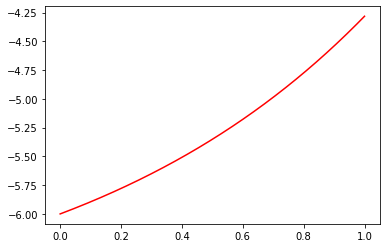

In [ ]:
x = np.array([0.0 ,0.1, 0.3, 0.6, 1.0])
y = np.array([-6.0, -5.89483, -5.65014, -5.17788, -4.28172])
point = np.array([0.4])
target = np.linspace(0.0, 1.0, 512)
f4 = lag_w_p(x, y, target)

print(lag_w_p(x,y,point))
fig1, ax1 = plt.subplots()
ax1.plot(target, f4, 'r', label = 'L_4')
plt.show()

[191647.51571655273, 214801.61776733398, 263305.256439209, -15309.99999999255]


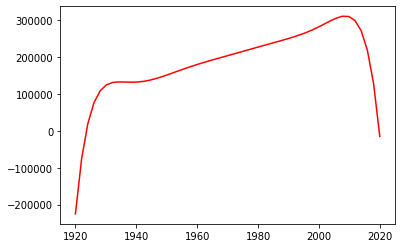

In [ ]:
x = np.array([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
y = np.array([123203, 131669, 150697, 179323, 203212, 226505, 249666, 281422, 308746])
point = np.array([1965, 1975, 1995, 2020])
target = np.linspace(1920, 2020)
f2 = lag_w_p(x, y, target)

print(lag_w_p(x,y,point))
fig2, ax2 = plt.subplots()
ax2.plot(target, f2, 'r', label = 'L_4')
plt.show()

In [ ]:
def f(x):
    y = np.sin(x)
    return y

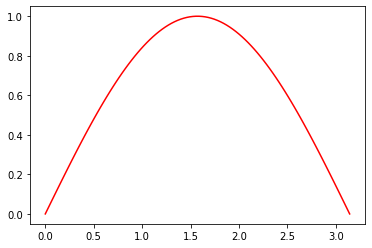

In [ ]:
x_plot = np.linspace(0, 3.14159, 100)
f3 = lag_w_f(f,10,x_plot)
fig3, ax3 = plt.subplots()
ax3.plot(x_plot, f3, 'r', label = 'L_4')
plt.show()

In [ ]:
def g1(x):
    y = np.abs(x)
    return y

In [ ]:
def g2(x):
  y = np.sign(x)
  return y

In [ ]:
from numpy.polynomial.chebyshev import chebpts1 as cp

In [ ]:
def two_inters(fcn, n, x_plots):
  uni_x = np.linspace(-1,1,n+1)
  cheb_x = cp(n+1)
  uni_y = fcn(uni_x)
  cheb_y = fcn(cheb_x)
  uni_f = lag_w_p(uni_x, uni_y, x_plots)
  cheb_f = lag_w_p(cheb_x, cheb_y, x_plots)
  return uni_f, cheb_f

In [ ]:
x_plots = np.linspace(-1,1,512)
f1_uni = dict()
f1_cheb = dict()
for j in [8,16,32]:
  f1_uni[str(j)], f1_cheb[str(j)] = two_inters(g1, j, x_plots)
f2_uni = dict()
f2_cheb = dict()
for j in [8,16,32]:
  f2_uni[str(j)], f2_cheb[str(j)] = two_inters(g2, j, x_plots)


In [ ]:
def plot_results(fcn,x_plots, hp):
  f11, ax11 = plt.subplots()
  ax11.plot(x_plots, fcn(x_plots), 'k', label = 'f')
  ax11.plot(x_plots, hp['8'], 'b--', label = 'uniform_L_8')
  ax11.grid()
  ax11.legend()
  f12, ax12 = plt.subplots()
  ax12.plot(x_plots, fcn(x_plots), 'k', label = 'f')
  ax12.plot(x_plots, hp['16'], 'r--', label = 'uniform_L_16')
  ax12.grid()
  ax12.legend()
  f13, ax13 = plt.subplots()
  ax13.plot(x_plots, fcn(x_plots), 'k', label = 'f')
  ax13.plot(x_plots, hp['32'], 'c--', label = 'uniform_L_32')
  ax13.grid()
  ax13.legend()
  plt.show()

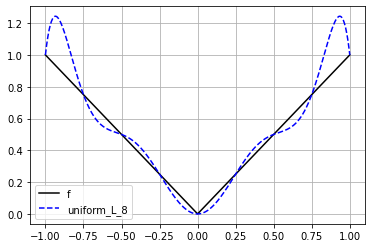

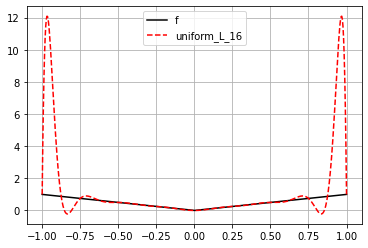

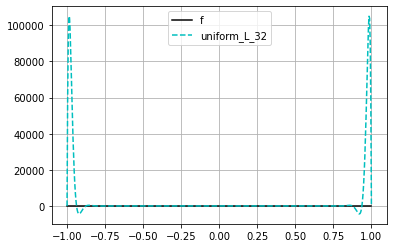

In [ ]:
plot_results(g1, x_plots, f1_uni)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

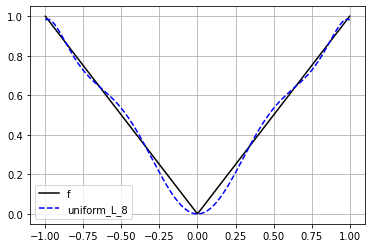

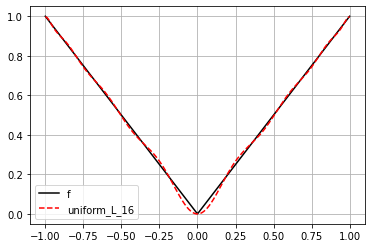

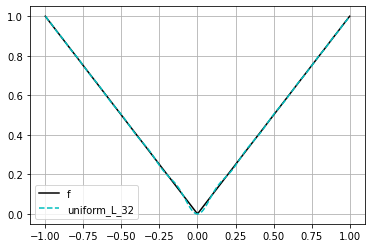

In [ ]:
plot_results(g1, x_plots, f1_cheb)

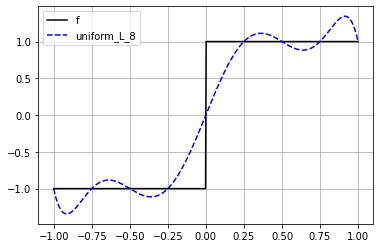

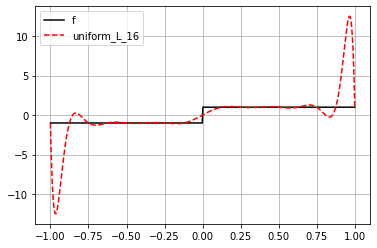

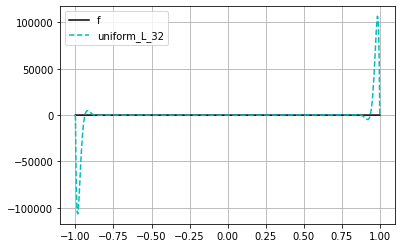

In [ ]:
plot_results(g2, x_plots, f2_uni)

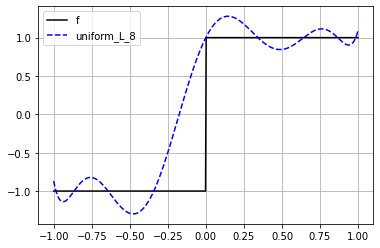

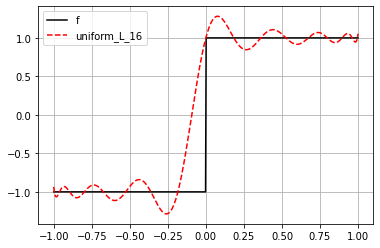

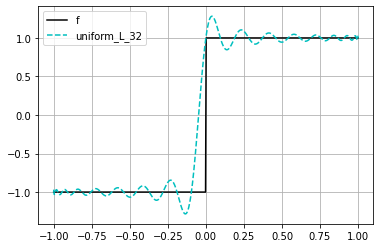

In [ ]:
plot_results(g2, x_plots, f2_cheb)